In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [20]:

# Replace 'Nyc' with the path to your CSV file
csv_path = 'NycSliceRawData.csv'

# Read data from CSV file using pandas
nyp = pd.read_csv(csv_path)

# Display the first few rows of the dataframe to ensure it was loaded correctly
nyp.head()


,Unnamed: 0,Name,location_lat,location_lng,Date,Year,Price as number,Price,Style
0,NaN,Tommy's Pizzeria,40.819562,-73.817209,2023-1205,2023,3.00,$3.00,Plain
1,NaN,99¢ Pizza,40.751655,-73.990435,2023-1129,2023,1.00,$1.00,Plain
2,NaN,Family Pizza,40.655857,-73.960172,2023-1028,2023,3.00,$3.00,Plain
3,NaN,Elegante Pizzeria,40.777182,-73.963597,2023-1021,2023,3.25,$3.25,Plain
4,NaN,Joe's Pizza,40.716897,-73.958958,2023-1018,2023,4.00,$4.00,Plain


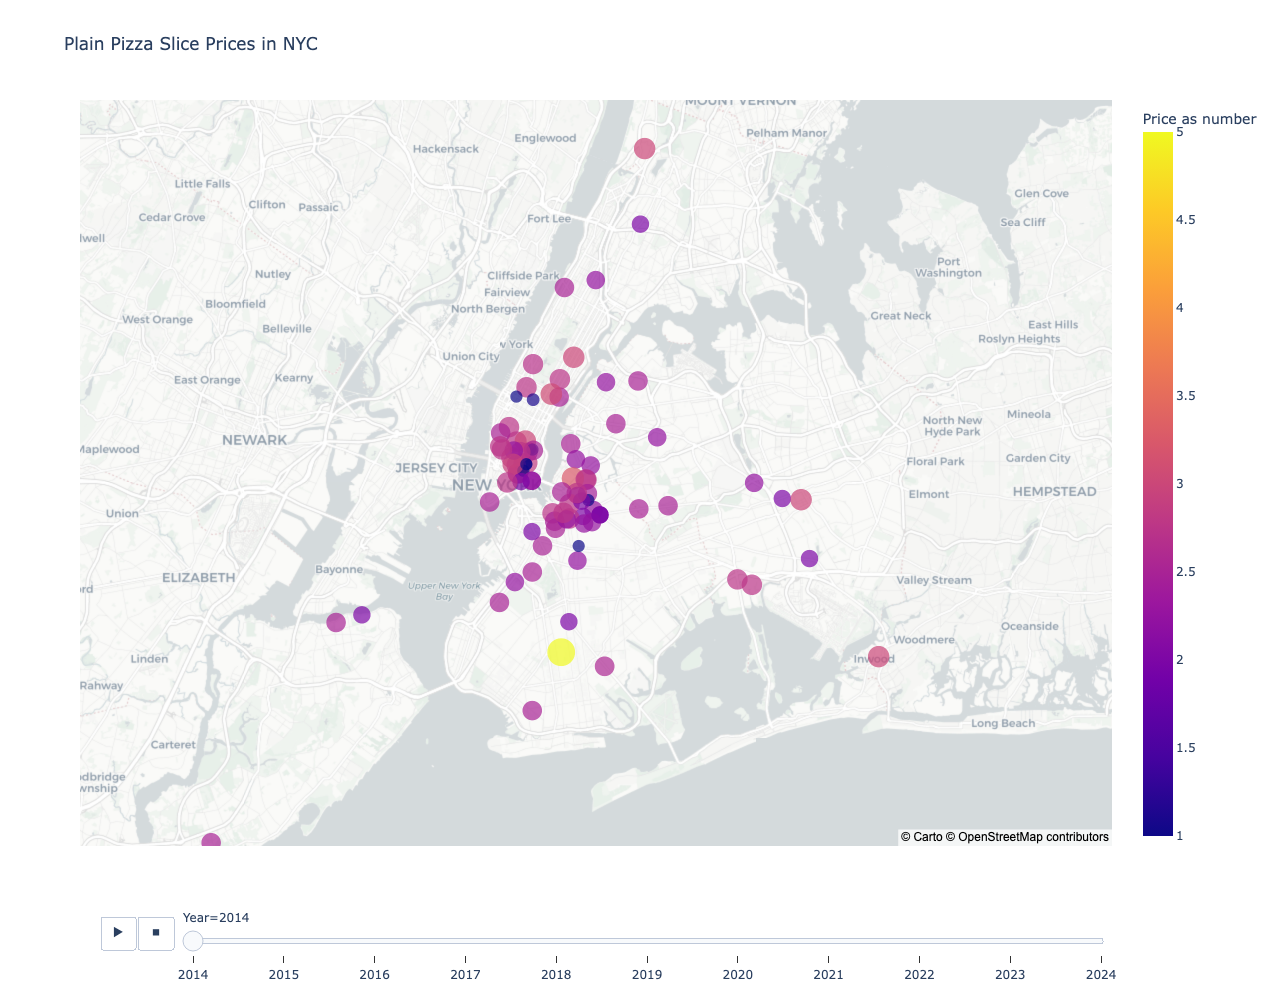

In [24]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named nyp
# Replace 'nyp' with your actual DataFrame

# Filter the DataFrame for 'Plain' style
plain_pizza_nyp = nyp[nyp['Style'] == 'Plain']

# Set the correct order of years
year_order = sorted(plain_pizza_nyp['Year'].unique())

# Create a geospatial heatmap with slider for plain pizza prices using Plotly Express
fig = px.scatter_mapbox(
    plain_pizza_nyp,
    lat='location_lat',
    lon='location_lng',
    size='Price as number',  # Use the 'Price' column for marker size
    color='Price as number',  # Use the 'Price' column for color intensity
    height=1000,
    hover_name='Name',  # Display restaurant names on hover
    animation_frame='Year',  # Use the 'Year' column for animation
    range_color=(plain_pizza_nyp['Price as number'].min(), plain_pizza_nyp['Price as number'].max()),  # Set the color range
    zoom=10,  # Adjust the initial zoom level
    mapbox_style='carto-positron',  # Choose the map style (you can explore other styles)
    title='Plain Pizza Slice Prices in NYC',
    category_orders={'Year': year_order}  # Set the order of years in the slider
)

# Customize the appearance
fig.update_layout(
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicG1qdGVybSIsImEiOiJjbHJwNnE0YTAwMmw2MmptdGZodDU3cTJ2In0.g4wJH64HhHsTViH9hZlINA',  # Replace with your Mapbox access token
        bearing=0,
        pitch=0
    )
)

# Show the map
fig.show()


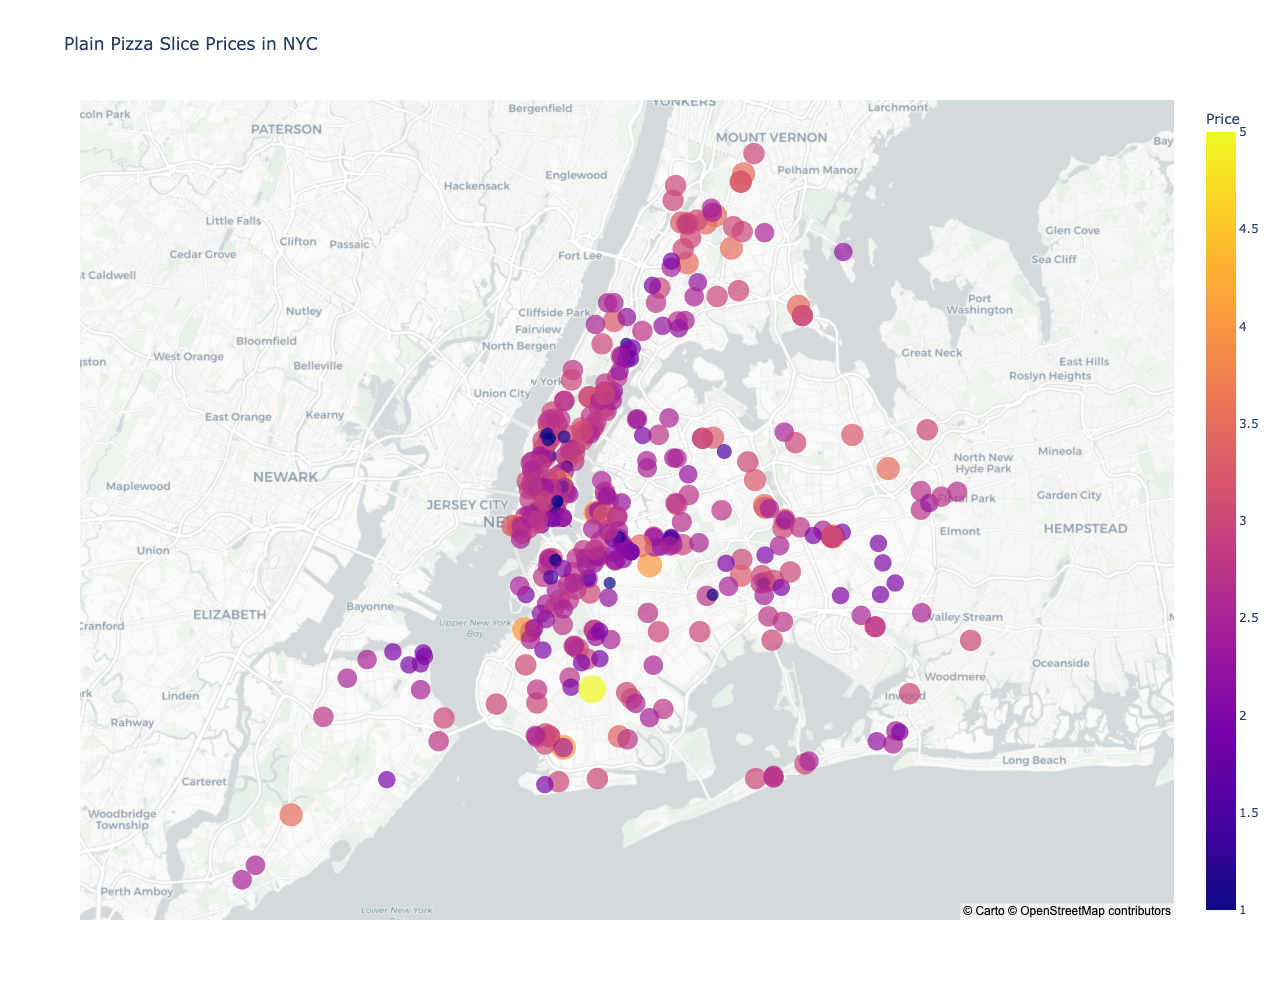

In [25]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named nyp
# Replace 'nyp' with your actual DataFrame

# Filter the DataFrame for 'Plain' style
plain_pizza_nyp = nyp[nyp['Style'] == 'Plain']

# Sample data for plain pizza (replace with your actual data)
data = {
    'Latitude': plain_pizza_nyp['location_lat'],
    'Longitude': plain_pizza_nyp['location_lng'],
    'Price': plain_pizza_nyp['Price as number'],
    'Restaurant': plain_pizza_nyp['Name']
}

df = pd.DataFrame(data)

# Create a geospatial heatmap for plain pizza using Plotly Express
fig = px.scatter_mapbox(
    df,
    lat='Latitude',
    lon='Longitude',
    size='Price',  # Use the 'Price' column for marker size
    color='Price',  # Use the 'Price' column for color intensity
    height=1000,
    hover_name='Restaurant',  # Display restaurant names on hover
    zoom=10,  # Adjust the initial zoom level
    mapbox_style='carto-positron',  # Choose the map style (you can explore other styles)
    title='Plain Pizza Slice Prices in NYC'
)

# Customize the appearance
fig.update_layout(
    mapbox=dict(
        accesstoken='pk.eyJ1IjoicG1qdGVybSIsImEiOiJjbHJwNnE0YTAwMmw2MmptdGZodDU3cTJ2In0.g4wJH64HhHsTViH9hZlINA',  # Replace with your Mapbox access token
        bearing=0,
        pitch=0
    )
)

# Show the map
fig.show()


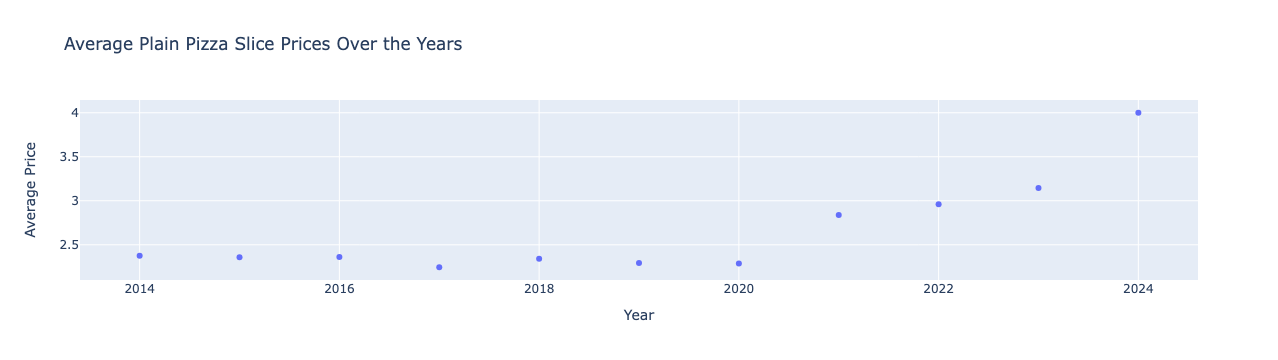

In [26]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named nyp
# Replace 'nyp' with your actual DataFrame

# Filter the DataFrame for 'Plain' style
plain_pizza_nyp = nyp[nyp['Style'] == 'Plain']

# Calculate the average price for each year
average_prices = plain_pizza_nyp.groupby('Year')['Price as number'].mean().reset_index()

# Create a scatter plot using Plotly Express
fig = px.scatter(
    average_prices,
    x='Year',
    y='Price as number',
    labels={'Price as number': 'Average Price'},
    title='Average Plain Pizza Slice Prices Over the Years'
)

# Show the plot
fig.show()
